In [124]:
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [125]:
import matplotlib.pyplot as plt



In [126]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
import matplotlib.pyplot as plt

In [147]:
customer_data = pd.read_csv("CustomerData.csv")

In [148]:
os.getcwd()

'E:\\Insofe\\Python Lab'

In [149]:
customer_data.head(5)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [150]:
customer_data.describe()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


In [151]:
customer_data.City = customer_data.City.astype("category")
customer_data.FavoriteChannelOfTransaction = customer_data.FavoriteChannelOfTransaction.astype("category")
customer_data.FavoriteGame = customer_data.FavoriteGame.astype("category")

In [152]:
customer_data.head(6)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
CustomerID                      3209 non-null int64
City                            3209 non-null category
NoOfChildren                    3209 non-null int64
MinAgeOfChild                   3209 non-null int64
MaxAgeOfChild                   3209 non-null int64
Tenure                          3209 non-null int64
FrquncyOfPurchase               3209 non-null int64
NoOfUnitsPurchased              3209 non-null int64
FrequencyOFPlay                 3209 non-null int64
NoOfGamesPlayed                 3209 non-null int64
NoOfGamesBought                 3209 non-null int64
FavoriteChannelOfTransaction    3209 non-null category
FavoriteGame                    3209 non-null category
TotalRevenueGenerated           3209 non-null float64
dtypes: category(3), float64(1), int64(10)
memory usage: 285.5 KB


In [153]:
customer_data["CustomerID"]

0       1001
1       1002
2       1003
3       1004
4       1005
5       1006
6       1007
7       1008
8       1009
9       1010
10      1011
11      1012
12      1013
13      1014
14      1015
15      1016
16      1017
17      1018
18      1019
19      1020
20      1021
21      1022
22      1023
23      1024
24      1025
25      1026
26      1027
27      1028
28      1029
29      1030
        ... 
3179    4180
3180    4181
3181    4182
3182    4183
3183    4184
3184    4185
3185    4186
3186    4187
3187    4188
3188    4189
3189    4190
3190    4191
3191    4192
3192    4193
3193    4194
3194    4195
3195    4196
3196    4197
3197    4198
3198    4199
3199    4200
3200    4201
3201    4202
3202    4203
3203    4204
3204    4205
3205    4206
3206    4207
3207    4208
3208    4209
Name: CustomerID, Length: 3209, dtype: int64

In [154]:
customer_data['City'].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

In [155]:
customer_data_city

,1,2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [156]:
custome_data_bk = customer_data.copy()

In [157]:
customer_data

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05
5,1006,1,2,3,4,378,16,16,228,12,16,Favorite,Favorite,150.00
6,1007,1,3,8,12,369,25,15,75,2,25,Favorite,Favorite,127.50
7,1008,1,2,6,8,404,13,12,1488,118,13,Favorite,Uniform,122.50
8,1009,1,4,6,9,420,20,16,2743,163,16,Uniform,Uniform,164.96
9,1010,2,3,5,6,333,15,15,1967,56,15,Favorite,Uniform,112.62


In [158]:
customer_data_city.info

<bound method DataFrame.info of       1  2
0     1  0
1     1  0
2     1  0
3     1  0
4     1  0
5     1  0
6     1  0
7     1  0
8     1  0
9     0  1
10    1  0
11    1  0
12    1  0
13    1  0
14    1  0
15    1  0
16    1  0
17    1  0
18    1  0
19    1  0
20    1  0
21    1  0
22    1  0
23    1  0
24    1  0
25    1  0
26    1  0
27    1  0
28    1  0
29    1  0
...  .. ..
3179  1  0
3180  1  0
3181  1  0
3182  1  0
3183  1  0
3184  1  0
3185  1  0
3186  1  0
3187  1  0
3188  1  0
3189  1  0
3190  1  0
3191  1  0
3192  1  0
3193  1  0
3194  1  0
3195  1  0
3196  1  0
3197  1  0
3198  1  0
3199  1  0
3200  1  0
3201  1  0
3202  1  0
3203  1  0
3204  1  0
3205  1  0
3206  1  0
3207  1  0
3208  1  0

[3209 rows x 2 columns]>

In [159]:
customer_data = customer_data.drop('CustomerID', axis =1)

In [160]:
customer_data.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [161]:
customer_data.columns

Index(['City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [164]:
customer_data = pd.get_dummies(customer_data, columns = ["City", "FavoriteChannelOfTransaction","FavoriteGame"],drop_first=True)

In [165]:
customer_data.isna().sum()

NoOfChildren                            0
MinAgeOfChild                           0
MaxAgeOfChild                           0
Tenure                                  0
FrquncyOfPurchase                       0
NoOfUnitsPurchased                      0
FrequencyOFPlay                         0
NoOfGamesPlayed                         0
NoOfGamesBought                         0
TotalRevenueGenerated                   0
City_2                                  0
FavoriteChannelOfTransaction_Uniform    0
FavoriteGame_Uniform                    0
dtype: int64

In [166]:
customer_data.columns

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

In [167]:
customer_data.shape
customer_data.info

<bound method DataFrame.info of       NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  FrquncyOfPurchase  \
0                2              3              8     210                 11   
1                2              3              6     442                 20   
2                4              3              5     424                 18   
3                1              6              6     261                 11   
4                3              6              9     422                 44   
5                2              3              4     378                 16   
6                3              8             12     369                 25   
7                2              6              8     404                 13   
8                4              6              9     420                 20   
9                3              5              6     333                 15   
10               1              5              5     323                  9   
11               3  

In [168]:
customer_data.iloc[:,[1,2,3,4,5,6,7,8,9,12]].corr()

,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,FavoriteGame_Uniform
MinAgeOfChild,1.000000,0.367127,-0.055820,-0.017568,-0.006191,0.006690,0.000104,-0.007748,0.024724,-0.021148
MaxAgeOfChild,0.367127,1.000000,-0.040329,-0.006213,-0.003926,0.012095,0.027947,-0.007062,0.005891,-0.004600
Tenure,-0.055820,-0.040329,1.000000,0.193344,0.192413,0.241809,0.273696,0.188285,0.116437,0.085138
FrquncyOfPurchase,-0.017568,-0.006213,0.193344,1.000000,0.934131,0.279957,0.397567,0.947787,0.663328,0.116140
NoOfUnitsPurchased,-0.006191,-0.003926,0.192413,0.934131,1.000000,0.311982,0.436149,0.868374,0.750379,0.113322
FrequencyOFPlay,0.006690,0.012095,0.241809,0.279957,0.311982,1.000000,0.740204,0.286943,0.233540,0.138669
NoOfGamesPlayed,0.000104,0.027947,0.273696,0.397567,0.436149,0.740204,1.000000,0.399178,0.293995,0.164413
NoOfGamesBought,-0.007748,-0.007062,0.188285,0.947787,0.868374,0.286943,0.399178,1.000000,0.495759,0.136982
TotalRevenueGenerated,0.024724,0.005891,0.116437,0.663328,0.750379,0.233540,0.293995,0.495759,1.000000,0.025306
FavoriteGame_Uniform,-0.021148,-0.004600,0.085138,0.116140,0.113322,0.138669,0.164413,0.136982,0.025306,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207E76C0128>,
      dtype=object)

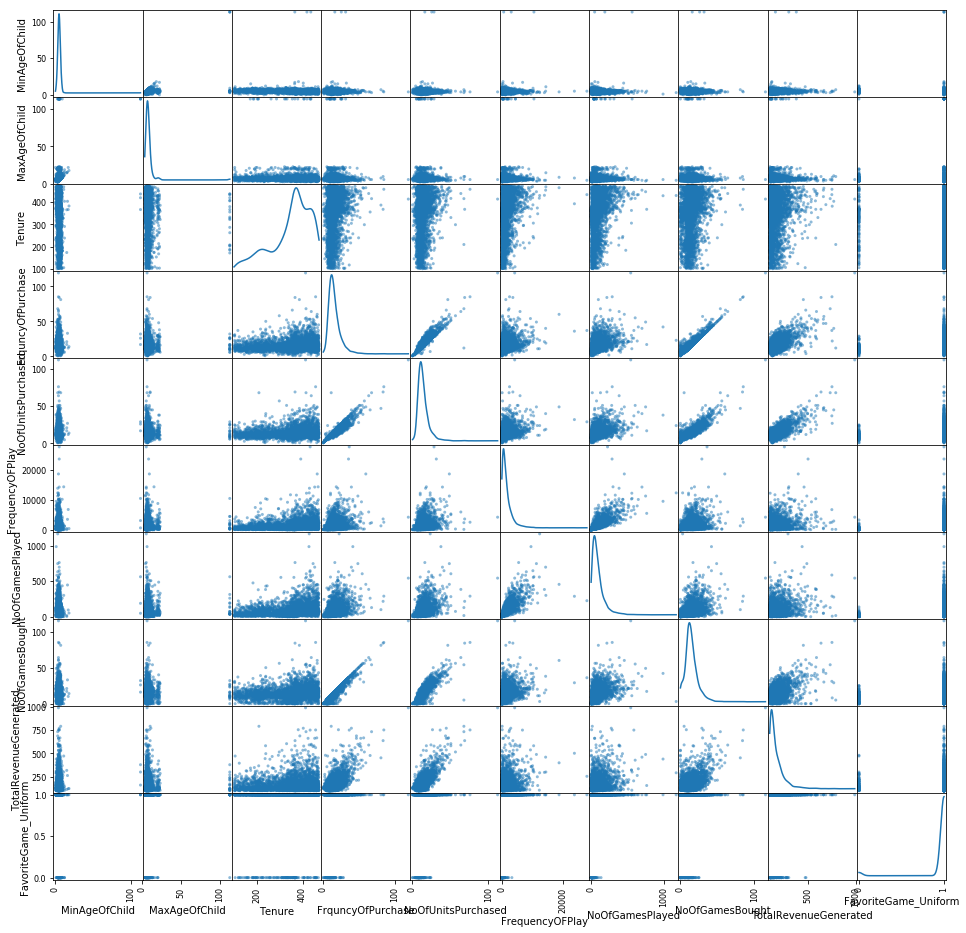

In [169]:
pd.plotting.scatter_matrix(customer_data.iloc[:,[1,2,3,4,5,6,7,8,9,12]], figsize=(16, 16), diagonal='kde')


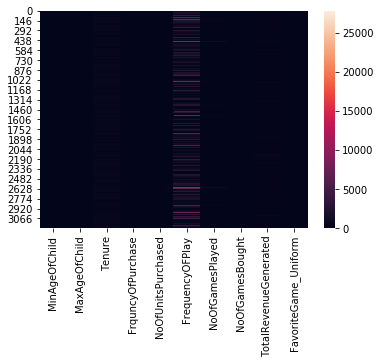

In [170]:
sns.heatmap(customer_data.iloc[:,[1,2,3,4,5,6,7,8,9,12]])

In [171]:
import seaborn as sns

In [172]:
sns.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [175]:
customer_data.shape

(3209, 13)

In [176]:
customer_train, customer_test = train_test_split(customer_data, test_size = 0.2)

In [177]:
customer_test.shape

(642, 13)

In [178]:
customer_train.shape
customer_train.columns


Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

In [179]:
customer_train.columns

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

In [181]:
IV = customer_train[['City_2','NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild','Tenure','FrquncyOfPurchase',
                    'NoOfUnitsPurchased','FrequencyOFPlay', 'NoOfGamesPlayed', 'NoOfGamesBought', 
                     'FavoriteChannelOfTransaction_Uniform','FavoriteGame_Uniform']]

In [182]:
IV.head()

,City_2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
2714,0,1,7,7,346,16,15,1101,93,16,1,1
1572,0,2,4,6,316,12,12,86,9,6,1,0
356,1,1,5,5,450,51,51,5039,282,51,0,1
1443,0,4,1,5,287,12,10,241,46,10,0,1
1185,0,2,2,8,214,10,10,3331,30,5,0,1


In [183]:
from sklearn import linear_model

In [184]:
TV = customer_train["TotalRevenueGenerated"]

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
lm1 = LinearRegression(TV,IV)

In [187]:
import statsmodels.api as sm

In [188]:
reg = linear_model.LinearRegression()

In [189]:
reg.fit(IV,TV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 39.51367387023137
Coefficients: 
 [ 9.27859290e+00  1.60129658e+00  8.51392737e-01 -9.21928428e-02
 -1.36814451e-02  1.09303997e+01  8.37161993e+00  3.16094111e-03
 -4.79512245e-02 -1.12274334e+01 -1.59071037e+01 -7.55638786e+00]
